# Regresión logística

Para empezar la practica, importamos las librerias que vamos a utilizar durante la practica de regresion lineal

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.tree as tree

Cargamos el dataset

In [2]:
df = pd.read_csv('bank-loan.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


Visualizamos la forma del dataset

In [3]:
df.shape

(850, 9)

Visualizamos la informacion del dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


Podemos observar que todas las columnas menos default contienen 850 filas, por lo que vamos a extraer 700 filas el cual lo utilzaremos para crear un modelo de regresión

In [10]:
# Check for missing values
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

Extraemos 700 filas de todas las columnas para llevar a cabo correctamente el procesamiento de datos

In [17]:
# Extraer las columnas con 700 registros utilizando iloc
x = df.iloc[:700, :8].values

y = df.iloc[:700, 8].values


Vemos el contenido de x

In [18]:
x

array([[41.      ,  3.      , 17.      , ...,  9.3     , 11.359392,
         5.008608],
       [27.      ,  1.      , 10.      , ..., 17.3     ,  1.362202,
         4.000798],
       [40.      ,  1.      , 15.      , ...,  5.5     ,  0.856075,
         2.168925],
       ...,
       [33.      ,  1.      , 15.      , ...,  7.6     ,  0.491264,
         1.940736],
       [45.      ,  1.      , 19.      , ...,  8.4     ,  2.302608,
         4.165392],
       [37.      ,  1.      , 12.      , ..., 14.7     ,  2.994684,
         3.473316]])

Vemos el contenido de y

In [19]:
y

array([1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 0.

Dividimos  los datos en datasets de prueba y entrenamiento

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (x, y, test_size=0.3, random_state=0)

Entrenamos el clasificador de regresión logística

In [21]:
# Ajustar (entrenar) el clasificador de regresión logística
lgm = linear_model.LogisticRegression(C=1e40, solver='newton-cg')
hw_model = lgm.fit(X_train, Y_train)

Hacemos predicciones sobre el conjunto de prueba x

In [24]:
x_prediction = df.iloc[700:, :8].values

In [25]:
x_prediction

array([[36.      ,  1.      , 16.      , ..., 10.9     ,  0.544128,
         2.943872],
       [50.      ,  1.      ,  6.      , ..., 12.9     ,  1.316574,
         1.392426],
       [40.      ,  1.      ,  9.      , ..., 17.      ,  4.8807  ,
         0.7293  ],
       ...,
       [48.      ,  1.      , 13.      , ..., 10.8     ,  0.722304,
         3.381696],
       [35.      ,  2.      ,  1.      , ...,  7.8     ,  0.417456,
         1.454544],
       [37.      ,  1.      , 20.      , ..., 12.9     ,  0.89913 ,
         4.38987 ]])

Ahora realizamos preddiciones para x_test y las guardamos en y_pred, para posteriormente compararlas con y_test

In [26]:
Y_train_pred = hw_model.predict(X_train)
Y_test_pred = hw_model.predict(X_test)
y_preddiccion_pred = hw_model.predict(x_prediction)
y_preddiccion_pred

array([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Imprimimos la prediccion anterior generadas por el modelo de regresion logistica y las comparamos con las etiquetas reales

In [31]:
for i in range(150):
    if y_preddiccion_pred[i] == 0:
        result = "No default"
    else:
        result = "Default"
                
    print("Cliente", i+1, ":", result)


Cliente 1 : No default
Cliente 2 : No default
Cliente 3 : Default
Cliente 4 : No default
Cliente 5 : No default
Cliente 6 : No default
Cliente 7 : No default
Cliente 8 : Default
Cliente 9 : No default
Cliente 10 : No default
Cliente 11 : No default
Cliente 12 : No default
Cliente 13 : No default
Cliente 14 : No default
Cliente 15 : No default
Cliente 16 : No default
Cliente 17 : Default
Cliente 18 : No default
Cliente 19 : No default
Cliente 20 : No default
Cliente 21 : No default
Cliente 22 : No default
Cliente 23 : No default
Cliente 24 : No default
Cliente 25 : No default
Cliente 26 : No default
Cliente 27 : No default
Cliente 28 : No default
Cliente 29 : No default
Cliente 30 : No default
Cliente 31 : No default
Cliente 32 : No default
Cliente 33 : Default
Cliente 34 : No default
Cliente 35 : No default
Cliente 36 : No default
Cliente 37 : No default
Cliente 38 : No default
Cliente 39 : No default
Cliente 40 : No default
Cliente 41 : Default
Cliente 42 : No default
Cliente 43 : No 

### Mostrar los valores de los parámetros
![alt text](https://miro.medium.com/max/2220/1*siWAvCzFy2zp81pDNoa4UA.png)

Imprimimos los valores de los coeficientes y la intersección

In [32]:
# Se tienen 3 valores de theta

# para theta_0
print (hw_model.intercept_)
print(hw_model.coef_)

[-0.89488923]
[[ 0.00843077  0.12011979 -0.25303381 -0.09506417 -0.00470533  0.045837
   0.64086561  0.10047013]]


## Modelos de clasificación y métricas

Importamos las librebrias para los modelos de clasificacion y las metricas

In [33]:
# Importar modelos y clases de evaluación de rendimiento desde sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

Generamos los modelos de clasificacion y las metricas, utilizando la regresion logistica y la matriz de confusion

In [34]:
print(" Exactitud (Accuracy) {0:.2f}%\n".format(100*
                        accuracy_score(Y_test, Y_test_pred)))

# Muestra la matriz de confusión
print('Matriz de confusión\n')
print(confusion_matrix(Y_test, Y_test_pred))

# tn, fp, fn, tp = confusion_matrix(logreg_prediction, Y_test).ravel()
tn, fp, fn, tp = confusion_matrix(Y_test,Y_test_pred).ravel()
print ("\nVerdaderos negativos: ", tn)
print ("\nFalsos positivos: ",fp)
print ("\nFalsos negativos: ",fn)
print ("\nVerdaderos positivos: ",tp)

 Exactitud (Accuracy) 80.48%

Matriz de confusión

[[147   8]
 [ 33  22]]

Verdaderos negativos:  147

Falsos positivos:  8

Falsos negativos:  33

Verdaderos positivos:  22


Generamos el reporte de clasificacion, mostrandonos la precision, recall, f1-score y support de cada clase

In [35]:
# Reporte de clasificación
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88       155
         1.0       0.73      0.40      0.52        55

    accuracy                           0.80       210
   macro avg       0.77      0.67      0.70       210
weighted avg       0.79      0.80      0.78       210



Y por ulimo obtenemos el puntaje de precision ROC-AUC

In [36]:
# Obtener el puntaje ROC-AUC
print("Puntaje ROC-AUC Regresión Logística {0:.2f}".
         format(roc_auc_score(Y_test, Y_test_pred)))

Puntaje ROC-AUC Regresión Logística 0.67


Ahora se generan los modelos para KNN y arbol de decisión. Importamos las librerias necesarias para llevar a cabo el desarrollo de los modelos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

Primero generamos el modelo KNN

In [56]:
# Modelar con KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
print("Exactitud (Accuracy) {0:.2f}%\n".format(100*accuracy_score(Y_test, Y_pred)))


Exactitud (Accuracy) 72.38%



Despues, generamos el modelo de arbol de decision con los siguientes parametros

In [46]:
# Modelar arbol de decisión
from sklearn.tree import DecisionTreeClassifier
classTree = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth = 4)
classTree.fit(X_train, Y_train)
predTree = classTree.predict(X_test)
print("Exactitud (Accuracy) {0:.2f}%\n".format(100*accuracy_score(Y_test, predTree)))

Exactitud (Accuracy) 71.43%



In [50]:
import sklearn.tree as tree

Graficamos el arbol de decision

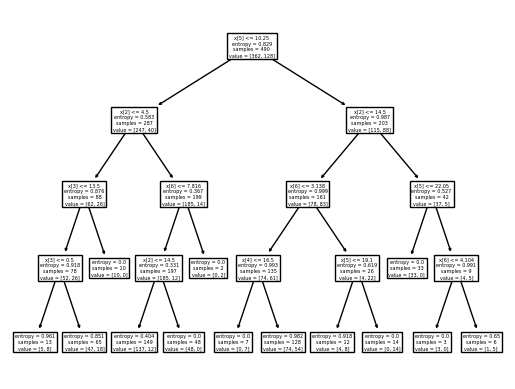

In [51]:
# Graficar arbol de decisión
tree.plot_tree(classTree)
plt.show()

Ahora generamos la matriz de confusion para KNN y el arbol de decision

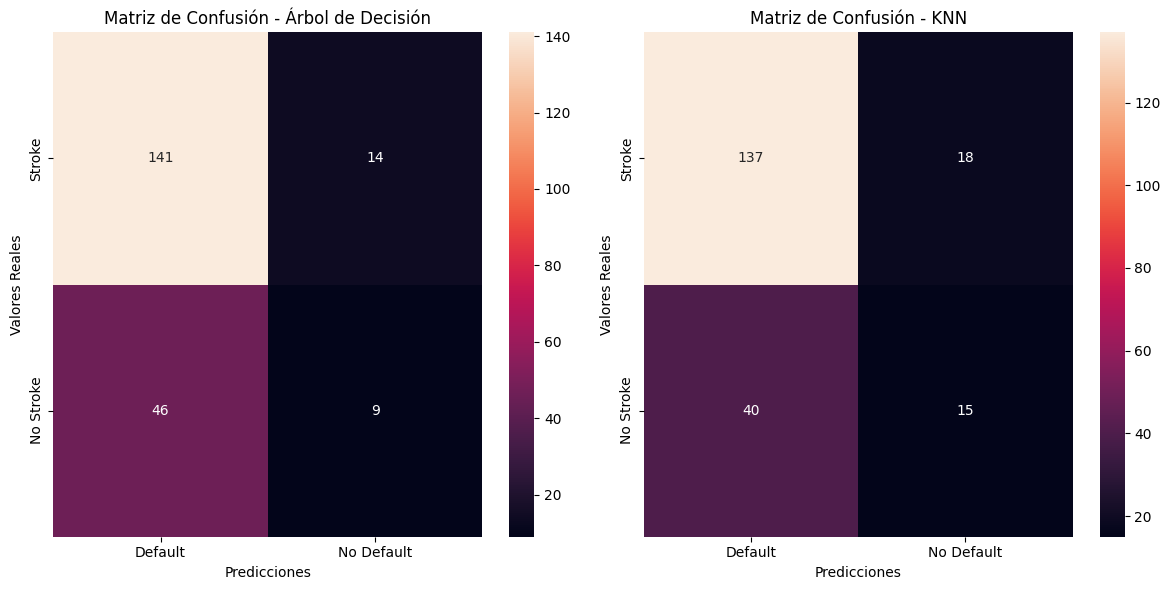

In [57]:
#Matriz de confusión para Arbol de decisión
cm_tree = confusion_matrix(Y_test, predTree)

#Matriz de confusion para KNN
cm_knn = confusion_matrix(Y_test, Y_pred_knn)

# Configurar la visualización
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfica del Árbol de Decisión
sns.heatmap(cm_tree, annot=True, fmt="d", xticklabels=['Default', 'No Default'], yticklabels=['Stroke', 'No Stroke'], ax=axes[0])
axes[0].set_title('Matriz de Confusión - Árbol de Decisión')
axes[0].set_xlabel('Predicciones')
axes[0].set_ylabel('Valores Reales')

# Gráfica de KNN
sns.heatmap(cm_knn, annot=True, fmt="d", xticklabels=['Default', 'No Default'], yticklabels=['Stroke', 'No Stroke'], ax=axes[1])
axes[1].set_title('Matriz de Confusión - KNN')
axes[1].set_xlabel('Predicciones')
axes[1].set_ylabel('Valores Reales')

plt.tight_layout()
plt.show()

Generamos el reporte de clasificacion para cada uno de los modelos

In [58]:
from sklearn.metrics import classification_report

#Clasificacion de reporte para KNN
print(classification_report(Y_test, Y_pred_knn))

#Clasificacion de reporte para Arbol de decisión
print(classification_report(Y_test, predTree))

              precision    recall  f1-score   support

         0.0       0.77      0.88      0.83       155
         1.0       0.45      0.27      0.34        55

    accuracy                           0.72       210
   macro avg       0.61      0.58      0.58       210
weighted avg       0.69      0.72      0.70       210

              precision    recall  f1-score   support

         0.0       0.75      0.91      0.82       155
         1.0       0.39      0.16      0.23        55

    accuracy                           0.71       210
   macro avg       0.57      0.54      0.53       210
weighted avg       0.66      0.71      0.67       210



Y por ulimo, graficamos la curva roc con sus respectivos modelos

AUC Arbol de decisión: 0.72
AUC KNN: 0.71


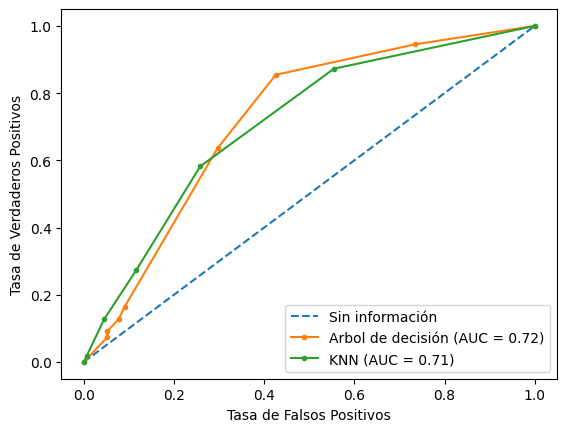

In [59]:
#graficar curva roc para arbol de decision y knn
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Calcular probabilidades de predicción
probs_tree = classTree.predict_proba(X_test)
probs_knn = knn.predict_proba(X_test)

# Mantener solo las probabilidades positivas
probs_tree = probs_tree[:, 1]
probs_knn = probs_knn[:, 1]

#Calcular AUC
auc_tree = roc_auc_score(Y_test, probs_tree)
auc_knn = roc_auc_score(Y_test, probs_knn)

# Imprimir AUC
print('AUC Arbol de decisión: %.2f' % auc_tree)
print('AUC KNN: %.2f' % auc_knn)

# Calcular la curva ROC
fpr_tree, tpr_tree, thresholds_tree = roc_curve(Y_test, probs_tree)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y_test, probs_knn)

# Graficar la curva ROC
plt.plot([0, 1], [0, 1], linestyle='--', label='Sin información')
plt.plot(fpr_tree, tpr_tree, marker='.', label='Arbol de decisión (AUC = %0.2f)' % auc_tree)
plt.plot(fpr_knn, tpr_knn, marker='.', label='KNN (AUC = %0.2f)' % auc_knn)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.show()

# Analisis de resultados

Segun los resultados obtenidos, el modelo regresion logistica es el que mejor se ajusta a los datos, ya que tiene un puntaje de precision ROC-AUC de 0.80, lo cual es el valor mas alto de los demas modelos, ademas de tener un recall de 0.95, lo cual es un valor aceptable para el modelo de arbol de decision.
Sin embargo, con el los demas modelos de KNN y arbol de decision se obtuvo un puntaje de precision ROC-AUC de 0.72 y 0.71 respectivamente, lo cual es un valor aceptable, pero no es el mejor de los modelos.